<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/preprocessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



bl = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bw = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
sl = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
sw = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((bl+sl, bw+sw)) # 2열로 된 배열.

fish_target = np.concatenate((np.ones(35), np.zeros(14)))# 1 행으로 된 배열.

'''
매개변수	설명
X, y	나눌 데이터입니다. X는 입력(특징), y는 타겟(레이블)입니다.
test_size	테스트 데이터의 비율 또는 개수입니다. 예: 0.2는 20%를 테스트 데이터로 사용.
train_size	학습 데이터의 비율 또는 개수입니다. 보통 test_size와 함께 쓰지 않거나, 둘 중 하나만 지정합니다.
random_state	랜덤 시드값을 지정합니다. 같은 시드를 주면 항상 같은 방식으로 나뉩니다 (재현성 보장).
shuffle	데이터를 섞을지 여부입니다. 기본값은 True입니다. 시계열 데이터 등에서는 False로 설정할 수 있습니다.
stratify	데이터를 나눌 때, y의 클래스(햄이냐 고기냐) 비율을 유지하려면 이 값을 y로 설정합니다. (분류 문제에서 유용)
'''

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify=fish_target, random_state=42)




kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
print(kn.score(test_input, test_target))

print(kn.predict([[25, 150]]))



1.0
[0.]


In [ ]:
distance, indexes = kn.kneighbors([[25, 150]])
# 가장 가까운 거리들, train_data index들

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='*')

In [ ]:
'''
그래프를 아래와 같이 그려봐서 실제 거리를 그래프와 match 시킨다
'''

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='*')
plt.xlim(0,1000) # x scale 을 y 랑 같이 맞춰서 그래프를보면..(x is originally 40)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
'''
표준점수로 바꾸기.(z value)
'''
mean = np.mean(train_input, axis=0) #axis=0세로 열 별로..그러니까 렝쓰와 웨잇별로 평균과 std를 구한다.
std = np.std(train_input, axis=0) #axis=0세로

train_scaled = (train_input - mean) / std # broad casting연산. 행렬에서 평균을 뺴고 std나누는데 알아서 전체 행렬에 대해 계산한다.
test_scaled = (test_input - mean) / std

print(train_scaled)

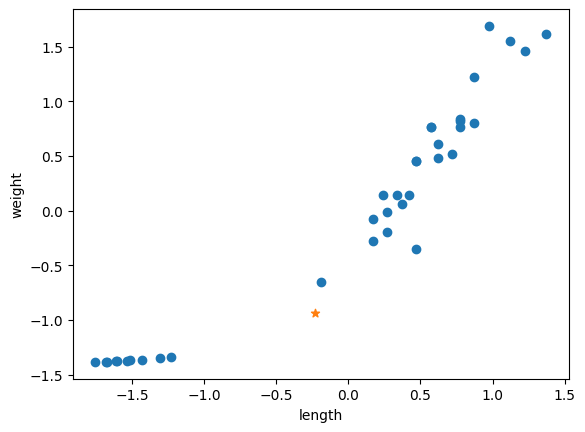

In [ ]:
new = ([25,150]-mean)/std # 중요!!. 원래 대에터도 scale 시켜야 해.

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print(kn.predict([new])) #도미

[1.]


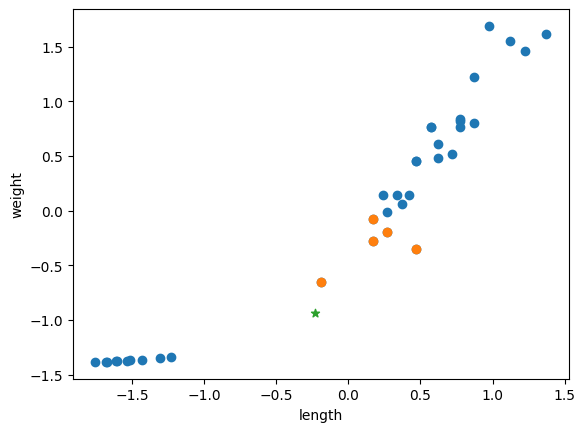

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])
plt.scatter(new[0], new[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()